<a href="https://colab.research.google.com/github/LizbethRamosSaucedo/Softys-/blob/main/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns


# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving actual nielsen.xlsx to actual nielsen (1).xlsx


In [ ]:
data= pd.read_excel('actual nielsen.xlsx')

In [ ]:
df = pd.DataFrame(data)
df = df.rename(columns={'Ventra Hojas': 'Venta Hojas'})
df = df.rename(columns={'Fabricante': 'Fabricante'})
#df

In [ ]:
df= df[df['Año'] >= 2019]
#df= df[df['Semana'] >= 40] #rendiplus fue apartir de semana 40 del 2022

In [ ]:
df

,Área,Año,Mes,Semana,Fabricante,Categoría,Marca,Submarca,Segmento,IdProducto,DescProducto,Conteo,Hojas,Venta Pesos,Venta Paquetes,Venta Unidades,Venta Hojas,Precio x paquete,Distr Num,Distr Pond
125925,1,2019,1,1,KIMBERLY-CLARK,PH,COTTONELLE,COT BEAUTY,PREMIUM,7501943413245,PH COT BEAUTY 18R 192HT,18,192,532575.00,4538.0,81684.0,15683328.0,117.358969,37.000000,48.000
125926,1,2019,1,1,KIMBERLY-CLARK,PH,COTTONELLE,COT BEAUTY,PREMIUM,7501943495937,PH COT BEAUTY 4R 192HT,4,192,316388.00,12694.0,50776.0,9748992.0,24.924216,56.000000,71.000
125927,1,2019,1,1,KIMBERLY-CLARK,PH,COTTONELLE,COT BEAUTY,PREMIUM,7501943493308,PH COT BEAUTY 24R 192HT,24,192,6340.00,51.0,1224.0,235008.0,124.313725,0.000000,0.000
125928,1,2019,1,1,KIMBERLY-CLARK,PH,COTTONELLE,COT ELEGANCE,PREMIUM,7501943463523,PH COT ELEGANCE 12R 252HD,12,252,166009.00,1781.0,21372.0,5385744.0,93.211117,35.000000,37.000
125929,1,2019,1,1,KIMBERLY-CLARK,PH,COTTONELLE,COT ELEGANCE,PREMIUM,7506425603305,PH COT ELEGANCE 4R 204HD,4,204,3325.00,133.0,532.0,108528.0,25.000000,1.000000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375237,6,2024,2,5,DEMAS FABRICANTES,PH,DEMAS MARCAS,DEMAS MARCAS,PAPEL HUMEDO,7503025406107,PH PACIFICA PAPEL 1R 30HS,1,30,976.68,18.0,18.0,540.0,54.260000,1.930502,1.087
375238,6,2024,2,5,DEMAS FABRICANTES,PH,FAMILIAR,FAMILIAR,ECONOMICO,7503022217010,PH FAMILIAR HIGIENICO 4R 605HD,4,605,13607.61,451.0,1804.0,1091420.0,30.172084,0.579151,0.439
375239,6,2024,2,5,DEMAS FABRICANTES,PH,FAMILIAR,FAMILIAR,ECONOMICO,7503022217072,PH FAMILIAR BASICO 4R 400HD,4,400,5387.39,251.0,1004.0,401600.0,21.463705,0.579151,0.439
375240,6,2024,2,5,DEMAS FABRICANTES,PH,SANIMAX,SANIMAX,OTROS,7502313540011,PH SANIMAX 4R 425 HD,4,425,13365.84,623.0,2492.0,1059100.0,21.453997,0.579151,0.439


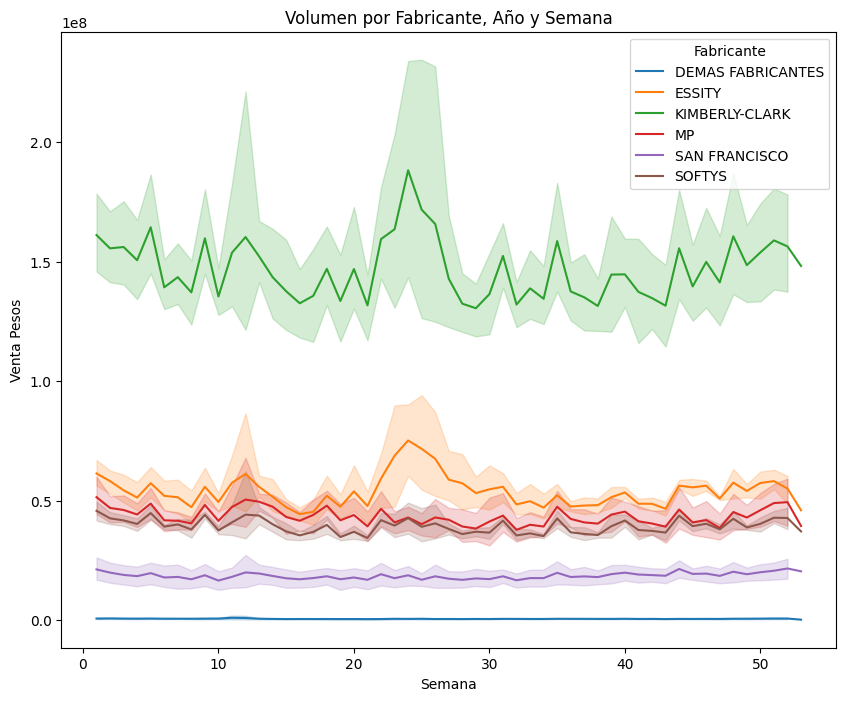

In [ ]:
df_agrupado = df.groupby(['Fabricante','Año', 'Semana'])['Venta Pesos'].sum().reset_index()
colores = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

plt.figure(figsize=(10, 8))
sns.lineplot(x='Semana', y='Venta Pesos', hue='Fabricante', data=df_agrupado, palette=colores)
plt.title('Volumen por Fabricante, Año y Semana')
plt.xlabel('Semana')
plt.ylabel('Venta Pesos')
plt.show();


In [ ]:
def run_analysis(df, sub_brand=None, segment=None):
    tabla_softys = df[df['Fabricante'] == 'SOFTYS']

    if tabla_softys.empty:
        print("No se encontraron datos para el fabricante Softys.")
        return None, None  # Return None for both if DataFrame is empty

    # Filter by sub-brand if provided
    if sub_brand:
        tabla_softys = tabla_softys[tabla_softys['Submarca'] == sub_brand]

    # Filter by segment if provided
    if segment:
        tabla_softys = tabla_softys[tabla_softys['Segmento'] == segment]

    if tabla_softys.empty:
        print("No se encontraron datos para la combinación de submarca y segmento proporcionada.")
        return None, None  # Return None for both if DataFrame is empty

    limites_año_sub = tabla_softys.groupby(['Año', 'Submarca'])['Venta Pesos'].quantile([0.25, 0.75]).unstack()

    intr = limites_año_sub.diff(axis=1).iloc[:, 1]
    min_limit = limites_año_sub[0.25] - 1.5 * intr
    max_limit = limites_año_sub[0.75] + 1.5 * intr

    outliers = (
        (tabla_softys['Venta Pesos'] < min_limit.loc[tabla_softys.set_index(['Año', 'Submarca']).index].values) |
        (tabla_softys['Venta Pesos'] > max_limit.loc[tabla_softys.set_index(['Año', 'Submarca']).index].values)
    )

    df_sin_outliers = tabla_softys.copy()
    df_sin_outliers.loc[outliers, 'Venta Pesos'] = np.nan
    df_sin_outliers['Venta Pesos'] = (
        df_sin_outliers.groupby(['Año', 'Submarca'])['Venta Pesos']
        .transform(lambda x: x.fillna(x.mean()))
    )

    return df_sin_outliers, tabla_softys  # Return both filtered DataFrame and tabla_softys

# Example usage:
input_option = input("¿Desea filtrar por submarca, segmento o ambos? (submarca/segmento/ambos): ").strip().lower()

if input_option == 'submarca':
    sub_brand = input("Ingrese la submarca deseada: ").strip().upper()
    df_modificado_softys, tabla_softys = run_analysis(df, sub_brand=sub_brand)
elif input_option == 'segmento':
    segment = input("Ingrese el segmento deseado: ").strip().upper()
    df_modificado_softys, tabla_softys = run_analysis(df, segment=segment)
elif input_option == 'ambos':
    sub_brand = input("Ingrese la submarca deseada: ").strip().upper()
    segment = input("Ingrese el segmento deseado: ").strip().upper()
    df_modificado_softys, tabla_softys = run_analysis(df, sub_brand=sub_brand, segment=segment)
else:
    print("Opción no válida. Por favor, seleccione 'submarca', 'segmento' o 'ambos'.")

# Now you can use tabla_softys outside the function
if tabla_softys is not None:
    print(tabla_softys.head())  # Displaying the original filtered DataFrame
else:
    print("No se pudo obtener tabla_softys. Asegúrese de que el análisis se haya completado correctamente.")

¿Desea filtrar por submarca, segmento o ambos? (submarca/segmento/ambos): AMBOS
Ingrese la submarca deseada: PREMIER
Ingrese el segmento deseado: ECONOMICO
        Área   Año  Mes  Semana Fabricante Categoría    Marca Submarca  \
126054     1  2019    1       1     SOFTYS        PH  PREMIER  PREMIER   
126055     1  2019    1       1     SOFTYS        PH  PREMIER  PREMIER   
126056     1  2019    1       1     SOFTYS        PH  PREMIER  PREMIER   
126215     1  2019    1       2     SOFTYS        PH  PREMIER  PREMIER   
126216     1  2019    1       2     SOFTYS        PH  PREMIER  PREMIER   

         Segmento     IdProducto         DescProducto  Conteo  Hojas  \
126054  ECONOMICO    99072000674  PH PREMIER 4R 400HD       4    400   
126055  ECONOMICO  7502247337015  PH PREMIER 9R 400HD       9    400   
126056  ECONOMICO  7502247337169  PH PREMIER 6R 225HD       6    225   
126215  ECONOMICO    99072000674  PH PREMIER 4R 400HD       4    400   
126216  ECONOMICO  7502247337015  PH PR

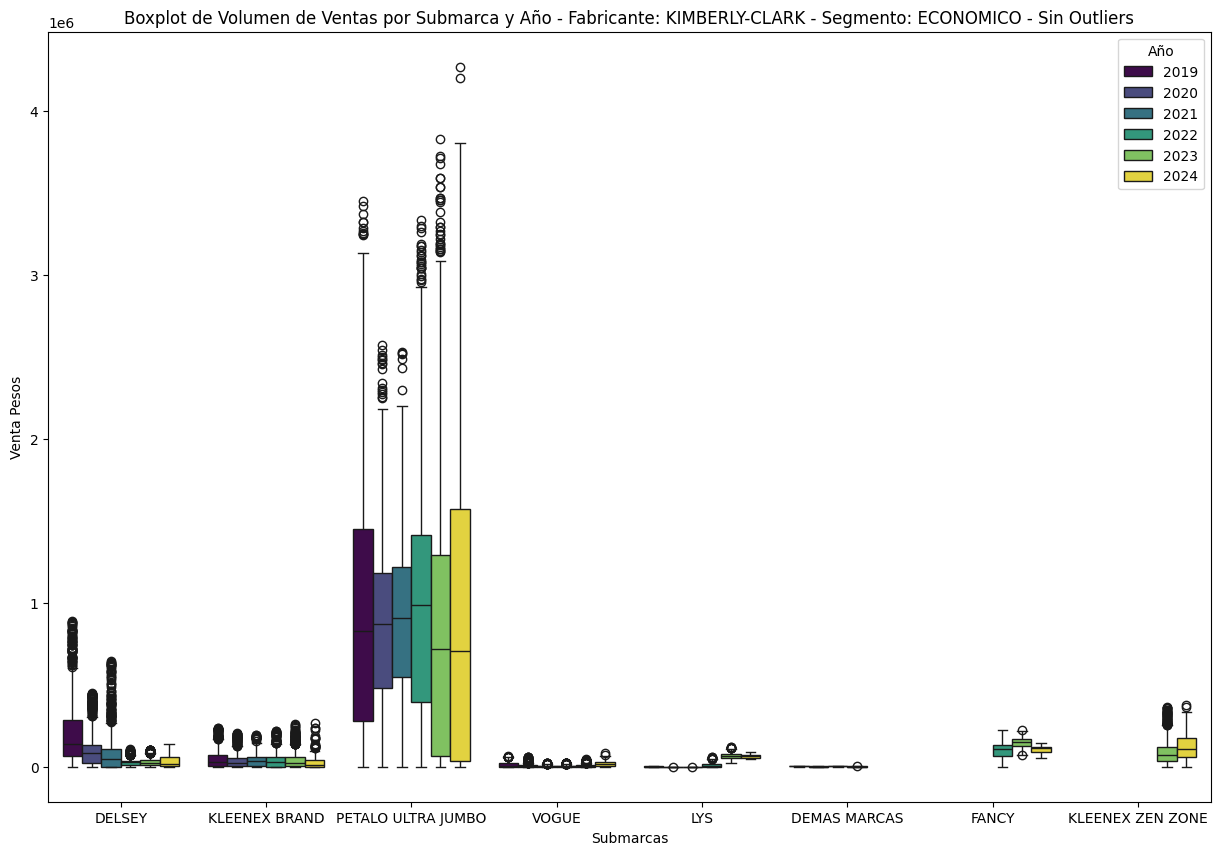

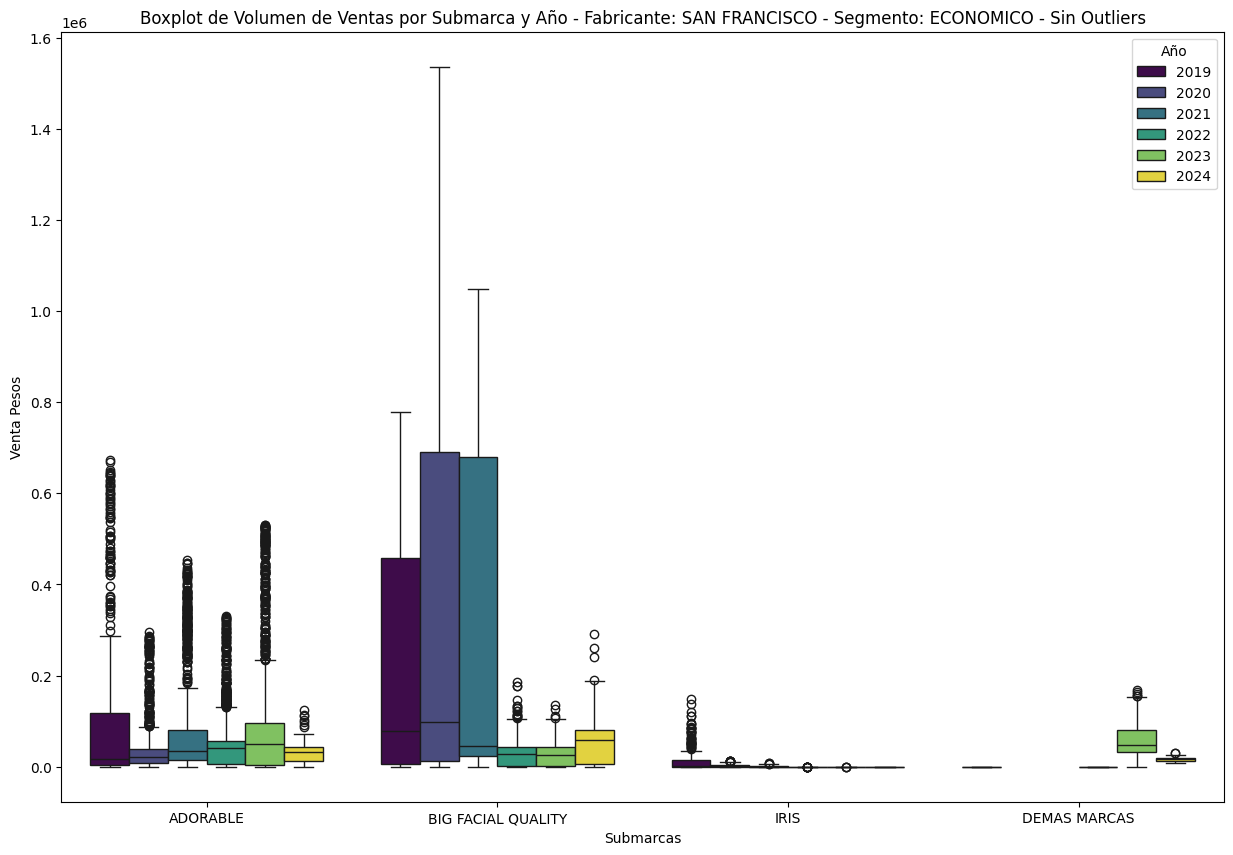

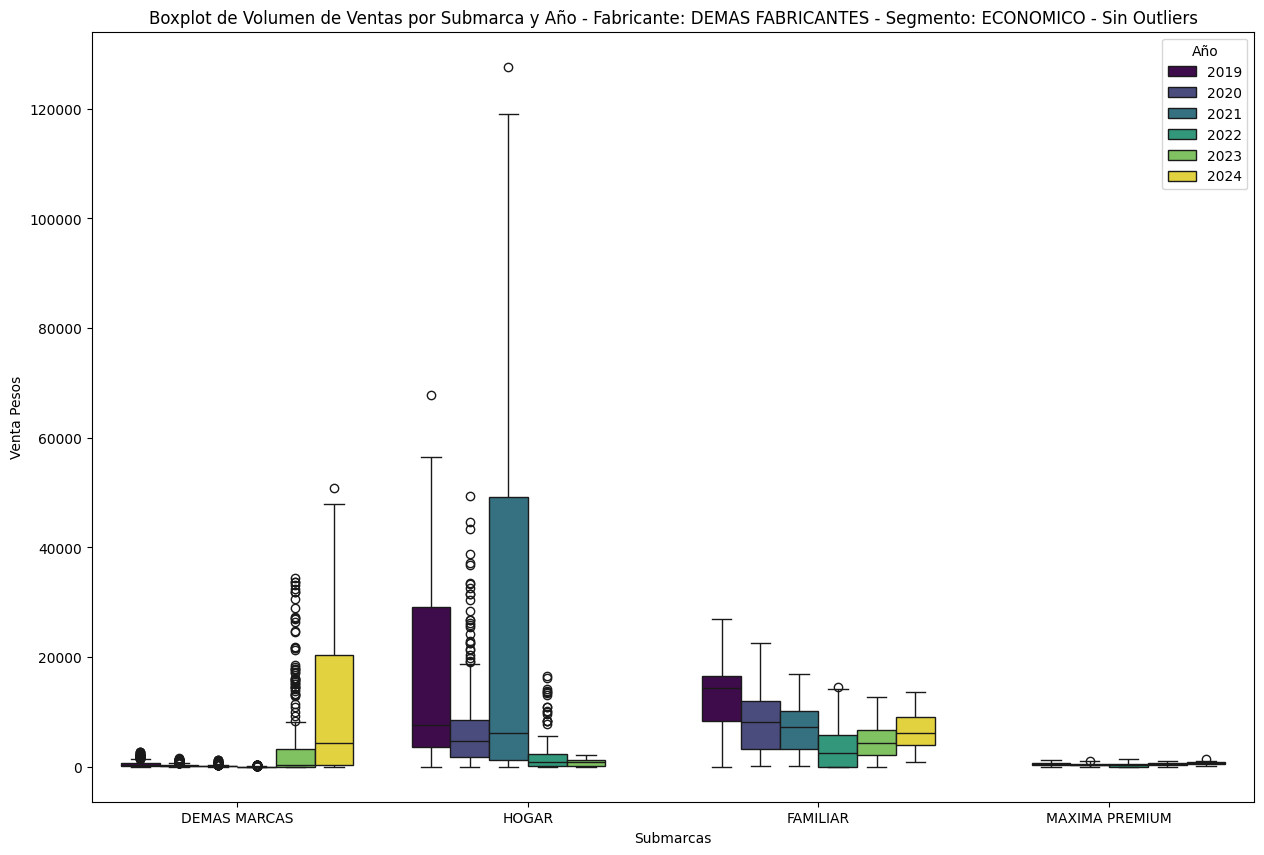

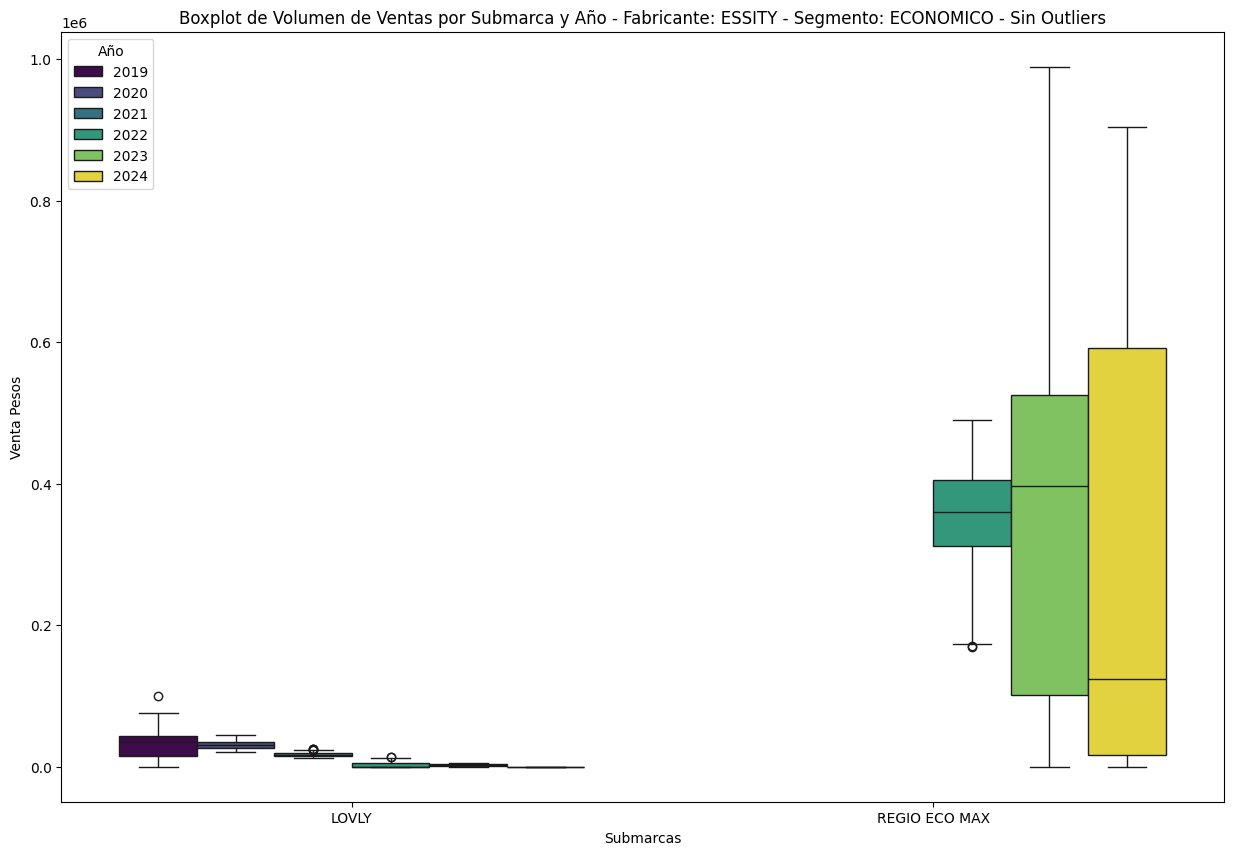

DataFrame Concatenado:
        Área   Año  Mes  Semana      Fabricante Categoría    Marca  \
125949     1  2019    1       1  KIMBERLY-CLARK        PH   DELSEY   
125950     1  2019    1       1  KIMBERLY-CLARK        PH   DELSEY   
125951     1  2019    1       1  KIMBERLY-CLARK        PH  KLEENEX   
125952     1  2019    1       1  KIMBERLY-CLARK        PH  KLEENEX   
125962     1  2019    1       1  KIMBERLY-CLARK        PH   PETALO   
...      ...   ...  ...     ...             ...       ...      ...   
374745     6  2024    1       3          ESSITY        PH    REGIO   
374942     6  2024    1       4          ESSITY        PH    REGIO   
374943     6  2024    1       4          ESSITY        PH    REGIO   
375142     6  2024    2       5          ESSITY        PH    REGIO   
375143     6  2024    2       5          ESSITY        PH    REGIO   

                  Submarca   Segmento     IdProducto  \
125949              DELSEY  ECONOMICO  7501943460959   
125950              DELS

In [ ]:
def run_analysis(df, segment=None):
    df_industria = df[df['Segmento'] == segment]

    if df_industria.empty:
        print("No se encontraron datos para el segmento proporcionado.")
        return None  # Devuelve None si no hay datos

    fabricantes = df_industria['Fabricante'].unique()
    dfs_concatenados = pd.DataFrame()  # Inicializa un DataFrame vacío

    for fabricante in fabricantes:
        if fabricante != 'SOFTYS':
            data_fabricante = df_industria[df_industria['Fabricante'] == fabricante]

            # Tratar valores atípicos para este fabricante específico
            limites_año_sub = data_fabricante.groupby(['Año', 'Submarca'])['Venta Pesos'].quantile([0.25, 0.75]).unstack()
            intr = limites_año_sub.diff(axis=1).iloc[:, 1]
            min_limit = limites_año_sub[0.25] - 1.5 * intr
            max_limit = limites_año_sub[0.75] + 1.5 * intr
            outliers = (
                (data_fabricante['Venta Pesos'] < min_limit.loc[data_fabricante.set_index(['Año', 'Submarca']).index].values) |
                (data_fabricante['Venta Pesos'] > max_limit.loc[data_fabricante.set_index(['Año', 'Submarca']).index].values)
            )
            data_sin_outliers = data_fabricante.copy()
            data_sin_outliers.loc[outliers, 'Venta Pesos'] = np.nan
            data_sin_outliers['Venta Pesos'] = (
                data_sin_outliers.groupby(['Año', 'Submarca'])['Venta Pesos']
                .transform(lambda x: x.fillna(x.mean()))
            )

            # Concatenar datos al DataFrame resultante
            dfs_concatenados = pd.concat([dfs_concatenados, data_sin_outliers])

            # Generar el boxplot para este fabricante específico
            plt.figure(figsize=(15, 10))
            sns.boxplot(x='Submarca', y='Venta Pesos', hue='Año', data=data_sin_outliers, palette='viridis')
            plt.xlabel('Submarcas')
            plt.ylabel('Venta Pesos')
            plt.title(f'Boxplot de Volumen de Ventas por Submarca y Año - Fabricante: {fabricante} - Segmento: {segment} - Sin Outliers')
            plt.legend(title='Año')
            plt.show()

    print("DataFrame Concatenado:")
    print(dfs_concatenados)  # Imprime el DataFrame concatenado
    return dfs_concatenados

# Llamada a la función y creación de df_ordenado
dfs_concatenados = run_analysis(df, segment)
if dfs_concatenados is not None:
    df_ordenado = dfs_concatenados.sort_values(by=['Año', 'Mes', 'Semana'], ascending=True)
    print("DataFrame Ordenado:")
    print(df_ordenado)

In [ ]:
df_ordenado = dfs_concatenados.sort_values(by=['Año', 'Mes', 'Semana'], ascending=True)


In [ ]:
precio = tabla_softys.groupby(['Año', 'Mes', 'Semana']).agg({'Venta Pesos': 'sum', 'Venta Hojas': 'sum', 'Distr Num': 'mean' }).reset_index()
precio = precio.sort_values(['Año', 'Mes', 'Semana'])
#precio

In [ ]:
otros_soft= df_modificado_softys.groupby(['Año', 'Mes', 'Semana']).agg({'Venta Pesos': 'sum', 'Venta Hojas': 'sum', 'Distr Num': 'mean' }).reset_index()
otros_soft = otros_soft.sort_values(['Año', 'Mes', 'Semana'])
#otros_soft

In [ ]:
softys1 = precio.copy()
softys1.loc[:, 'Precio'] = np.where((softys1['Venta Hojas'] == 0), 0, softys1['Venta Pesos'] / softys1['Venta Hojas'])
#softys1

In [ ]:
softys1['Venta Pesos'] = otros_soft['Venta Pesos']
#softys1  #aqui conserva el precio con los dtaos originales y tiene modificado el volumen que se hizo en el boxplot

In [ ]:
softys=softys1.drop(columns = ["Venta Pesos"])
#softys

In [ ]:
#Calcula prom venta en pesos  y la suma de Distr num, segun su mes y año
df_industria = df_ordenado.groupby(['Año', 'Mes','Semana']).agg({ 'Venta Hojas': 'sum' }).reset_index() #dist num base a 100--
#ordeno por año y mes
df_industria = df_industria.sort_values(['Año', 'Mes', 'Semana'])
df_industria = df_industria.rename(columns={'Venta Hojas': 'Volumen industria'})
#df_industria


DIVIDIR POR SEGMENTOS EL VOLUMEN INDUSTRUA

In [ ]:
df_meses = pd.get_dummies(softys['Mes'].astype(str))
# Ordenar las columnas
df_meses = df_meses[sorted(df_meses.columns, key=lambda x: int(x))]
df_r = pd.concat([softys, df_meses], axis=1)
df_r = df_r.drop('Mes', axis=1)

n = len(df_r)
df_r['Trend'] = np.arange(1, n + 1)
#df_r

In [ ]:
df_r= df_r.drop(['Año'], axis=1)

In [ ]:
tabla= pd.concat([df_r, df_industria], axis=1)
tabla =tabla.drop(['Año', 'Mes', 'Semana'], axis=1)
#tabla

In [ ]:
df_a=tabla.drop(['12'], axis=1) #quitamos el mes 12 para que no se cicle con el tiempo
df_a = df_a.rename(columns={'Venta Hojas': 'Volumen Softys'})
#df_a

In [ ]:
df_a.insert(1,'Precio', df_a.pop('Precio'))
#df_a

# normalizacion de datos

In [ ]:
#pip install scikit-learn


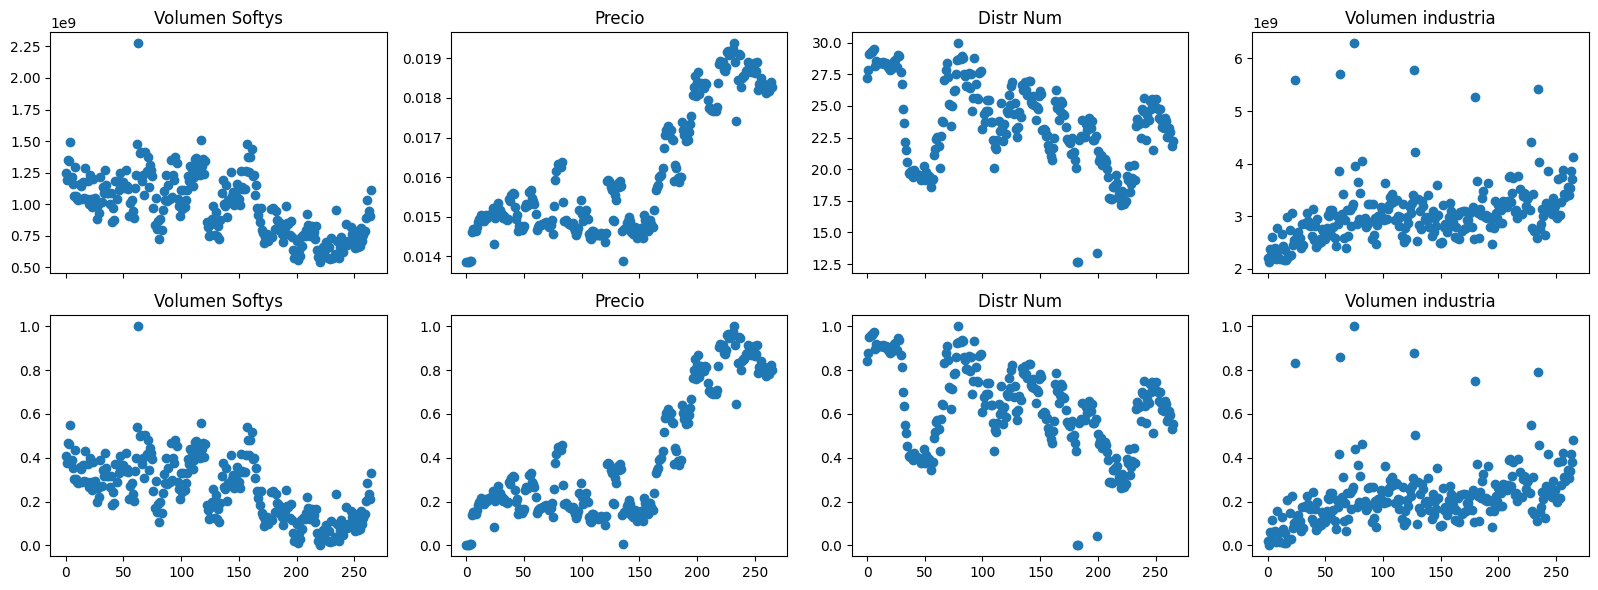

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columnas = ['Volumen Softys', 'Precio', 'Distr Num', 'Volumen industria']
scaler = MinMaxScaler()

df_normalizado = df_a.copy()
df_normalizado[columnas] = scaler.fit_transform(df_a[columnas])

fig, axs = plt.subplots(nrows=2, ncols=len(columnas), figsize=(16, 6), sharex=True)

for i, col in enumerate(columnas):
    axs[0, i].scatter(df_a.index, df_a[col], label='Original')
    axs[0, i].set_title(col)

for i, col in enumerate(columnas):
    axs[1, i].scatter(df_normalizado.index, df_normalizado[col], label='Normalizado')
    axs[1, i].set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
#df_a=df_normalizado
#df_a

In [ ]:
#Poner a la misma escala los datos

df_a['Volumen Softys'] = df_a['Volumen Softys'] / 100000
df_a['Precio'] = df_a['Precio'] * 100000
df_a['Volumen industria'] = df_a['Volumen industria'] / 100000

#df_a


In [ ]:
#ELIMINA El VALOR MAS ALTO
df_a = df_a.drop(index=[df_a['Volumen Softys'].idxmax(), df_a['Volumen industria'].idxmax()])

MEDIA MOVIL PARA SUAVIZACION DE DATOS

In [ ]:
df_avg = df_a.iloc[2:-2].copy()

#se calculo la media con una ventana de 7 dias, por lo tanto se eliminan los primeros y ultimos 3 datos
media_movil = np.convolve(df_a['Volumen Softys'], np.ones(5)/5, mode='valid')
media_movil_ind = np.convolve(df_a['Volumen industria'], np.ones(5)/5, mode='valid')
df_avg['Volumen Softys'] = media_movil[:len(df_avg)]
df_avg['Volumen industria'] = media_movil_ind[:len(df_avg)]
df_avg


,Volumen Softys,Precio,Distr Num,1,2,3,4,5,6,7,8,9,10,11,Trend,Volumen industria
2,13249.493220,1386.796301,29.142857,1,0,0,0,0,0,0,0,0,0,0,3,23109.670322
3,13191.142500,1389.178521,29.238095,1,0,0,0,0,0,0,0,0,0,0,4,23440.203068
4,13120.998980,1387.847955,29.285714,0,1,0,0,0,0,0,0,0,0,0,5,23976.927686
5,12550.237440,1461.281706,29.428571,0,1,0,0,0,0,0,0,0,0,0,6,23605.496692
6,12454.091080,1468.557178,29.476190,0,1,0,0,0,0,0,0,0,0,0,7,24646.963812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,8361.478608,1830.038550,23.796001,0,0,0,0,0,0,0,0,0,0,0,260,34310.272168
260,8753.152383,1813.548834,22.508198,0,0,0,0,0,0,0,0,0,0,0,261,34555.530159
261,9141.724458,1829.671916,22.591528,1,0,0,0,0,0,0,0,0,0,0,262,35550.004397
262,9371.014781,1817.756771,23.261106,1,0,0,0,0,0,0,0,0,0,0,263,36117.593369


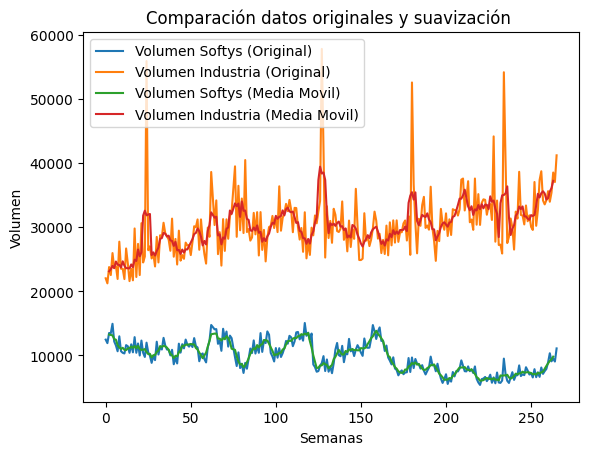

In [ ]:
plt.plot(df_a.index, df_a['Volumen Softys'], label='Volumen Softys (Original)')
plt.plot(df_a.index, df_a['Volumen industria'], label='Volumen Industria (Original)')
plt.plot(df_avg.index, df_avg['Volumen Softys'], label='Volumen Softys (Media Movil)')
plt.plot(df_avg.index, df_avg['Volumen industria'], label='Volumen Industria (Media Movil)')
plt.xlabel('Semanas')
plt.ylabel('Volumen')
plt.title('Comparación datos originales y suavización ')
plt.legend()
plt.show()


semanas que aumenta volumen (picos) en los datos en general (todas las submarcas)

la principal es la semana 12 del 2020


semana 25 del 2019


semana 24 del 2020


semana 24 del 2020



semana 23 del 2021


semana 24 del 2022


semana 26 del 2023



semana 27 del 2016



semana 25 del 2017


semana  25 del 2018


semana 25 del 2019


In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

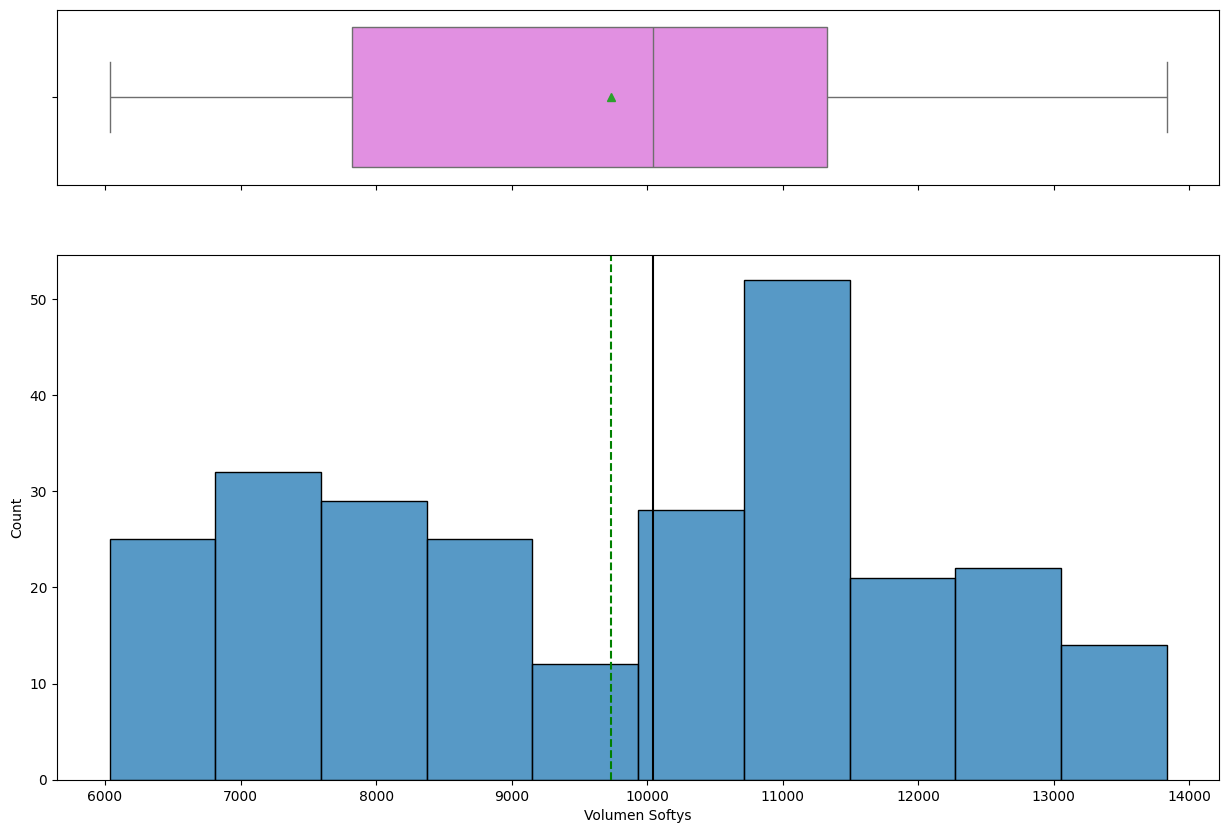

In [ ]:
histogram_boxplot(df_avg, "Volumen Softys")


##Checar variables




In [ ]:
df_avg.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 2 to 263
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Volumen Softys     260 non-null    float64
 1   Precio             260 non-null    float64
 2   Distr Num          260 non-null    float64
 3   1                  260 non-null    uint8  
 4   2                  260 non-null    uint8  
 5   3                  260 non-null    uint8  
 6   4                  260 non-null    uint8  
 7   5                  260 non-null    uint8  
 8   6                  260 non-null    uint8  
 9   7                  260 non-null    uint8  
 10  8                  260 non-null    uint8  
 11  9                  260 non-null    uint8  
 12  10                 260 non-null    uint8  
 13  11                 260 non-null    uint8  
 14  Trend              260 non-null    int64  
 15  Volumen industria  260 non-null    float64
dtypes: float64(4), int64(1), u

In [ ]:
df_avg.describe()

,Volumen Softys,Precio,Distr Num,1,2,3,4,5,6,7,8,9,10,11,Trend,Volumen industria
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,9735.448003,1610.031165,23.586558,0.080769,0.076923,0.092308,0.076923,0.076923,0.092308,0.076923,0.076923,0.096154,0.076923,0.076923,133.988462,30301.527653
std,2139.653993,158.880547,3.356438,0.273006,0.266983,0.290018,0.266983,0.266983,0.290018,0.266983,0.266983,0.295371,0.266983,0.266983,75.860748,3129.806934
min,6034.619380,1386.796301,12.641026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,23109.670322
25%,7822.750350,1482.873420,21.311543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000,28311.970476
50%,10045.137460,1536.231760,23.766667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.500000,30129.025911
75%,11328.981085,1767.682452,25.910714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.250000,32364.348314
max,13832.089340,1937.953503,29.954545,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,264.000000,39445.654814


todos son datos numericos

### Regresión

Variables a utilizar en el modelo de regresion

* **dependiente (y):** volumen softys (suma)

* **independientes(x):**
    * precio (suma)
    * meses (1-12)  
    * Promedio de Distr Num
    * Trend
    * Volumen contrincante



Se calculara ademas:

*  un estimado
* la elasticidad


aqui esta el código con la info completa como el excel


### Corrida en 70 / 30

In [ ]:
X = df_avg.drop(['Volumen Softys'], axis=1)  #variables independientes  #agregar nombre del suavizado
y = df_avg[['Volumen Softys']]#variable dependiente

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

**We will now split X and y into train and test sets in a 70:30 ratio.**




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
#print(X_train.head())

In [ ]:
#print(X_test.head())

## Regresión lineal

In [ ]:
model = olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()


In [ ]:
# let's print the regression summary
print (olsres.summary())

                            OLS Regression Results                            
Dep. Variable:         Volumen Softys   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     70.04
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.31e-63
Time:                        17:12:44   Log-Likelihood:                -1472.8
No. Observations:                 182   AIC:                             2978.
Df Residuals:                     166   BIC:                             3029.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.957e+04   1530.83

In [ ]:
r_cuadrado_ajustado = olsres.rsquared_adj
print(f'R cuadrado ajustado: {r_cuadrado_ajustado}')

R cuadrado ajustado: 0.8512261671027


## Prueba de significancia

Prueba de significancia


Con un alfa de 0.05


*  H0: todos los coeficientes son 0
*  Ha: al menos uno es diferente


RR


Rechazo H0 si p<alfa


Rechazo H0 si 0<0.05


 Entonces rechazo H0, al menos uno es diferente por lo que el modelo es significativo

X_train8 = X_train.drop([""], axis=1)
olsmod_10 = sm.OLS(y_train, X_train8)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())  #quitamos los que no tienen significancia ??

## Multicolinealidad

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))


VIF values: 

const                621.546952
Precio                 3.303218
Distr Num              1.751874
1                      1.550757
2                      1.579481
3                      1.759225
4                      1.496743
5                      1.476714
6                      1.982224
7                      1.702323
8                      1.444414
9                      1.688783
10                     1.397816
11                     1.525118
Trend                  3.956417
Volumen industria      2.333407
dtype: float64



 VIF < 10 sin problema de multicolinealidad, la constante no se considera

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,7938.283640,8753.695824,-815.412184
1,7675.701900,8062.557071,-386.855171
2,7460.905368,7372.512765,88.392603
3,12255.117740,11597.668026,657.449714
4,11244.376180,10958.038861,286.337319


### Normalidad de residuales

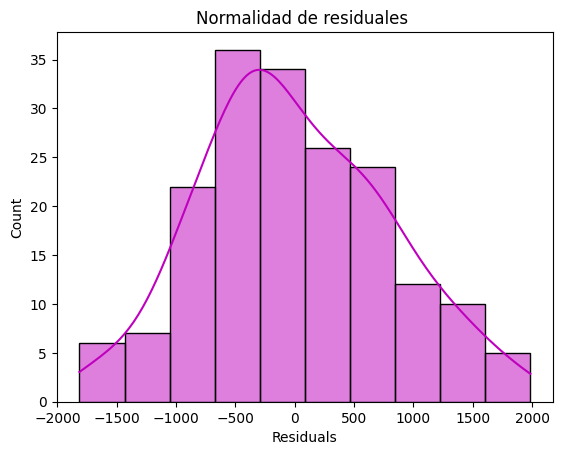

In [ ]:
sns.histplot(df_pred["Residuals"], color='#BF00BF', kde=True)
plt.title("Normalidad de residuales ")
plt.show()

#### qqplot

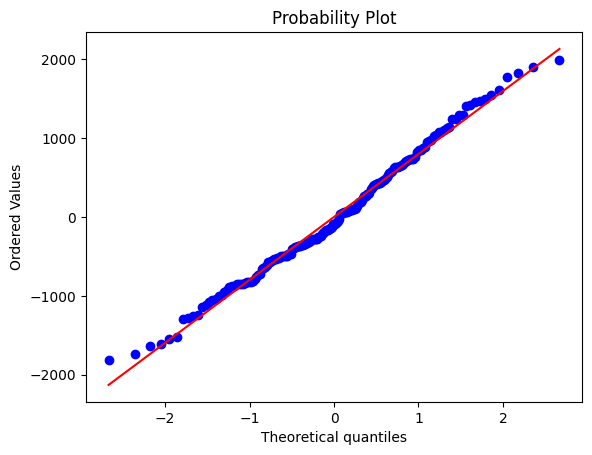

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
# Let us write the equation of linear regression
Equation = "Volumen Softys ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres.params[i], "* (", X_train.columns[i], ")")

Volumen Softys = 29571.21280744179 + -11.630499613358433 * ( Precio ) +  19.46358548348401 * ( Distr Num ) +  773.3535544369676 * ( 1 ) +  -80.63853341266196 * ( 2 ) +  -42.941570711267715 * ( 3 ) +  -251.00085066997258 * ( 4 ) +  -409.24878942802417 * ( 5 ) +  -724.1716863123565 * ( 6 ) +  -1426.6542015279895 * ( 7 ) +  -950.1502777883405 * ( 8 ) +  -476.35223248459 * ( 9 ) +  -384.64275125602285 * ( 10 ) +  -762.1812150400852 * ( 11 ) +  1.1173092518245813 * ( Trend ) +  -0.04565396080234018 * ( Volumen industria )



##Calculo de estimados

In [ ]:
results = model.fit()
coefficients = results.params[1:]
k= pd.DataFrame(coefficients, columns=['Coeficientes'])
matriz_coef=np.transpose(k)
matriz_coef=matriz_coef.drop('Distr Num', axis=1)
matriz_coef


,Precio,1,2,3,4,5,6,7,8,9,10,11,Trend,Volumen industria
Coeficientes,-11.6305,773.353554,-80.638533,-42.941571,-251.000851,-409.248789,-724.171686,-1426.654202,-950.150278,-476.352232,-384.642751,-762.181215,1.117309,-0.045654


In [ ]:
#matriz_coef.values
matriz_coef.iloc[0,0]

-11.630499613358433

In [ ]:
constante=results.params['const']
#constante

In [ ]:
estimados=df_avg.copy()
estimados=estimados.drop(['Volumen Softys', 'Distr Num'], axis=1)

#estimados

In [ ]:
columna1 = matriz_coef.values
estimados_f = []

for i in range(len(estimados)):
    # aumentar en 1+ cada valor de df_sin_vol[0:1] ( cambia a cada fila)
    columna2 = estimados.iloc[i:i+1].values
    columna2 = columna2.reshape(-1)
    columna1 = columna1.reshape(-1)

    # sumproduct del excel
    resultado = np.dot(columna1, columna2)+constante
    estimados_f.append(resultado)

estimados_f

[13163.73646351821,
 13122.057238276106,
 12260.153994424156,
 11424.157395846858,
 11293.11023181264,
 11330.83663873692,
 11407.788350850704,
 11322.263330612186,
 11131.471547063815,
 11055.854801038677,
 11149.685359120242,
 10761.474080164298,
 10845.270911062591,
 10908.623412796453,
 10809.028035679927,
 10561.571733948316,
 10631.820941413414,
 10493.395564130042,
 10538.250474021752,
 10173.641753340999,
 9858.250249157136,
 9690.872663232676,
 10783.25322232319,
 10001.066560562907,
 8992.987882963589,
 9151.009555561483,
 9372.177016108832,
 9376.976994770634,
 9915.836383326776,
 9911.748328341371,
 9962.205749818506,
 9909.049876885845,
 10434.146246951965,
 10448.727536746279,
 10455.399158036853,
 9856.374060813348,
 9965.659886076344,
 9863.609337570862,
 9862.983015664628,
 9852.019996632494,
 10306.008099024719,
 10265.070188510654,
 10196.915835027095,
 10621.859141529763,
 10510.648471151748,
 11241.018212118477,
 11360.536578418218,
 11267.374373077877,
 11202.5497

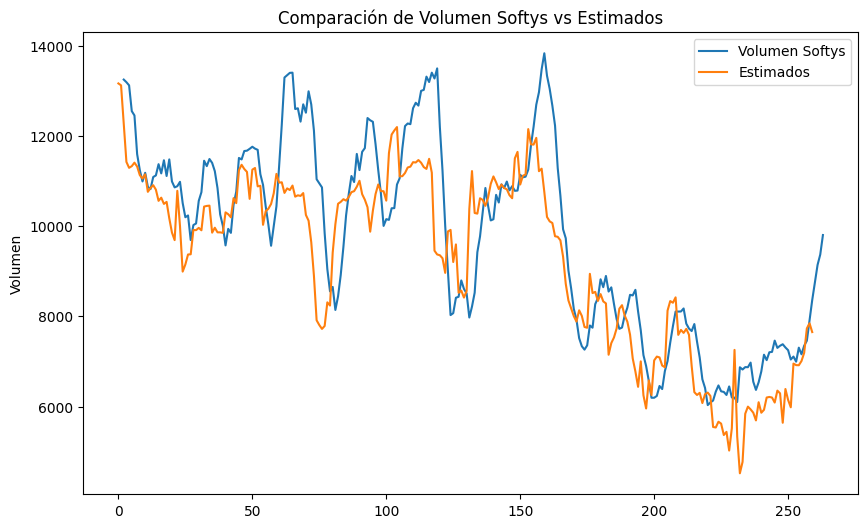

In [ ]:
plt.figure(figsize=(10, 6))
estimados = pd.DataFrame(estimados_f, columns=['Estimados'])
plt.plot(df_avg['Volumen Softys'], label='Volumen Softys')
plt.plot(estimados['Estimados'], label='Estimados')
plt.ylabel('Volumen')
plt.title('Comparación de Volumen Softys vs Estimados')
plt.legend()
plt.show()


### Calculo de elasticidad

In [ ]:
cp_1=softys.copy()
año_sema=cp_1[['Año', 'Semana']]


In [ ]:
df_merged = pd.concat([año_sema, df_a], axis=1)
#df_merged

In [ ]:
año_2023 = df_merged[df_merged['Año'] == 2023]
año_2023 = año_2023.dropna()

#año_2023


In [ ]:
pip install colorama

In [ ]:
from colorama import Fore, Style

print('Introduce a partir de qué semana deseas realizar la evaluación :')
semana = int(input())

semana_a = año_2023[año_2023['Semana'] >= semana]

precio_inicial = semana_a['Precio'].mean()
volumen_inicial = semana_a['Volumen Softys'].mean()
vol_industria=semana_a['Volumen industria'].mean()
print("\n" + "="*60)
print(f"\nEl precio inicial es: {precio_inicial}")
print(f"El volumen inicial es: {volumen_inicial}")
print("="*60 + "\n")

precio_final = precio_inicial * (1+0.04)
volumen_final = volumen_inicial + matriz_coef.iloc[0, 0]  # Se le suma el primer coeficiente

print(f"\nEl precio final es de {precio_final}")
print(f"El volumen final es de {volumen_final}")
print("="*60 + "\n")

var_precio = precio_final / precio_inicial - 1
var_volumen = volumen_final / volumen_inicial - 1
var = volumen_inicial - volumen_final
elasticidad = var_volumen / var_precio

print(f"\nLa variación en precio es de {var_precio}")
print(f"La variación en volumen es de {var_volumen}")
print("="*60)

if elasticidad > 0:
    print(Fore.GREEN + f"la elasticidad es de {elasticidad}" + Style.RESET_ALL)
elif elasticidad < 0:
    print(Fore.RED + f"La elasticidad es de {elasticidad}" + Style.RESET_ALL)
else:
    print(Fore.YELLOW + f"La elasticidad es de {elasticidad}" + Style.RESET_ALL)


Introduce a partir de qué semana deseas realizar la evaluación :
5


El precio inicial es: 1859.717279372855
El volumen inicial es: 6959.064807297917


El precio final es de 1934.1059705477694
El volumen final es de 6947.434307684558


La variación en precio es de 0.040000000000000036
La variación en volumen es de -0.0016712733586216055
La elasticidad es de -0.041781833965540104


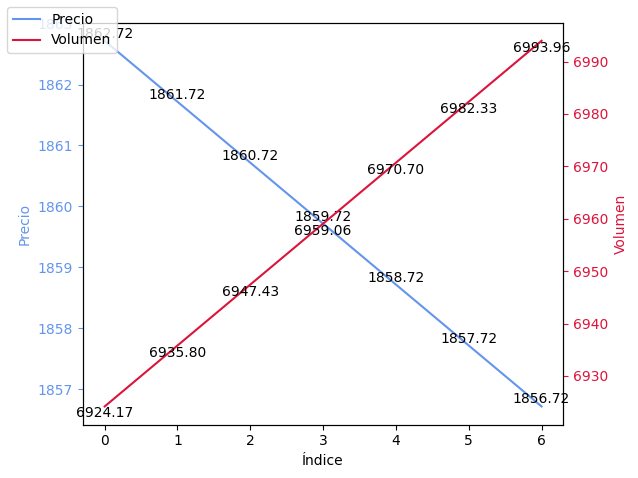

In [ ]:

precio = [precio_inicial + 3, precio_inicial + 2, precio_inicial + 1, precio_inicial, precio_inicial - 1, precio_inicial - 2, precio_inicial - 3]
volumen = [volumen_inicial - var * 3, volumen_inicial - var * 2, volumen_inicial - var, volumen_inicial,
           volumen_inicial + var, volumen_inicial + var * 2, volumen_inicial + var * 3]

eje_x = range(len(precio))

fig, ax1 = plt.subplots()

ax1.plot(eje_x, precio, label='Precio', color='cornflowerblue')
ax1.set_xlabel('Índice')
ax1.set_ylabel('Precio', color='cornflowerblue')
ax1.tick_params('y', colors='cornflowerblue')

ax2 = ax1.twinx()
ax2.plot(eje_x, volumen, label='Volumen', color='crimson')
ax2.set_ylabel('Volumen', color='crimson')
ax2.tick_params('y', colors='crimson')

fig.tight_layout()
fig.legend(loc='upper left')

for i, (x, y) in enumerate(zip(eje_x, precio)):
    ax1.text(x, y, f'{y:.2f}', ha='center', va='bottom')

for i, (x, y) in enumerate(zip(eje_x, volumen)):
    ax2.text(x, y, f'{y:.2f}', ha='center', va='top')
plt.show()


In [ ]:
#!pip install nbconvert

In [ ]:
#!jupyter nbconvert --to html Regresion.ipynb.